One example of a nonsequential neural network is a Wide & Deep neural network

It connects all or part of the inputs directly to the output layer

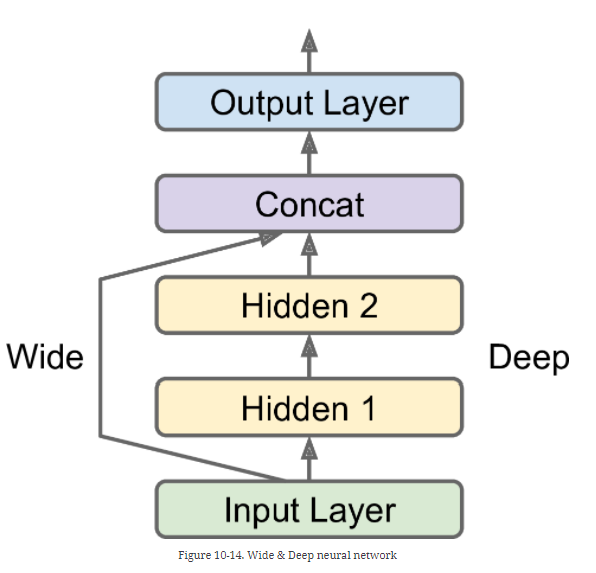

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

"""
removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
import tensorflow as tf
from tensorflow import keras

In [9]:
"""
First, we need to create an Input object. 
This is a specification of the kind of input the model will get, including its shape and dtype. 
A model may actually have multiple inputs, as we will see shortly.
"""
input_ = keras.layers.Input(shape=X_train.shape[1:])
"""
Next, we create a Dense layer with 30 neurons, using the ReLU activation function. 
As soon as it is created, notice that we call it like a function, passing it the input. 
This is why this is called the Functional API. 
Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.
"""
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

"""
We then create a second hidden layer, and again we use it as a function. 
Note that we pass it the output of the first hidden layer.
"""
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
"""
Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and 
the output of the second hidden layer. 
You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and 
immediately calls it with the given inputs.
"""
concat = keras.layers.Concatenate()([input_, hidden2])
"""
Then we create the output layer, with a single neuron and no activation function, 
and we call it like a function, passing it the result of the concatenation.
"""
output = keras.layers.Dense(1)(concat)
"""
Lastly, we create a Keras Model, specifying which inputs and outputs to use.
"""
model = keras.Model(inputs=[input_], outputs=[output])

Once you have built the Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path 

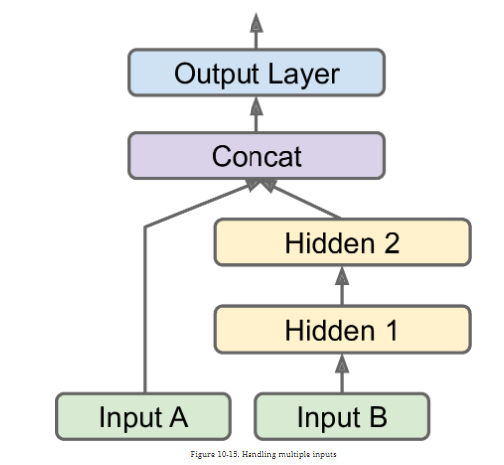

In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

In [10]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])